# HW 8: Clustering by K-Means
---

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline

# Import a Beer data set to a dataframe

In [1]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 22.1MB/s 


In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1bjCoHPxe_96Ijoz8eCzYUikwlkPA6XDc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('beer.txt')

In [5]:
url = 'beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


#### Let's pick the feature set

In [6]:
# Define X.
X = beer.drop('name', axis=1)
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


#### Do we need to define a target called Y? Explain.

**Answer:  we do not need to define a target, since  unsupervised learning we don't have labeled data. There are no true targets to predict, we derive the likely categories from the structure in our data.** 

## K-Means Clustering

#### Create a K-means model with three clusters and fit it with 'X'.

In [0]:
#
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn import metrics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [0]:
model = KMeans(n_clusters=3, random_state=0).fit(X)

#### Review and show the cluster labels.

In [9]:
# Check out model params
predicted = model.labels_
print("Predicted clusters to points: ", predicted)


Predicted clusters to points:  [0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2]


#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [10]:
# attach predicted cluster to original points
X['cluster'] = predicted
X.sort_values('cluster')

,calories,sodium,alcohol,cost,cluster
0,144,15,4.7,0.43,0
1,151,19,4.9,0.43,0
2,157,15,0.9,0.48,0
3,170,7,5.2,0.73,0
4,152,11,5.0,0.77,0
5,145,23,4.6,0.28,0
6,175,24,5.5,0.40,0
7,149,27,4.7,0.42,0
17,144,24,4.9,0.43,0
10,140,18,4.6,0.44,0


#### What feature(s) do the clusters seem to be based on? Why?

**Answer: In my opinion, the clusters seem to be based on the feature calories and alcohol, since the range of these two features are well seperated depends on the classification** 

#### Show the cluster centers.

In [11]:
#
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)


Location of centroids: 
[[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]


#### Calculate the mean of each feature for each cluster.

In [12]:
# hint: 
# beer.groupby('cluster').mean()
cluster_feature_mean = X.groupby('cluster').mean()
cluster_feature_mean

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,70.00,10.5,2.600000,0.420000
2,102.75,10.0,4.075000,0.440000


#### Save the `mean` of cluster centers as 'centers'.

In [13]:
#
centers = cluster_feature_mean.mean()
centers

calories    107.583333
sodium       12.500000
alcohol       3.732143
cost          0.460238
dtype: float64

#### Create a "colors" array for plotting.

In [0]:
colors = np.array(['red', 'green', 'blue'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

<Figure size 504x504 with 0 Axes>

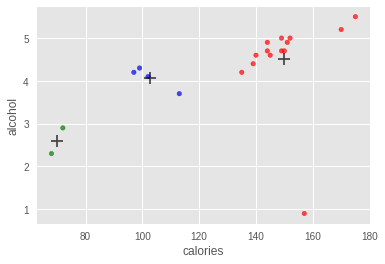

In [15]:
#
df = pd.DataFrame(X, columns=['calories', 'alcohol','cluster'])
color = []
for x in df['cluster']:
  if x == 0:
    color.append('red') 
  elif x == 1:
    color.append('green') 
  else:
    color.append('blue')

plt.figure(figsize=(7,7))
df.plot(x="calories", y="alcohol", kind="scatter", c = color , alpha=.7)
plt.scatter(centroids[:,0:1], centroids[:,2:3], marker='+', s=150, alpha=.7, c='black')



#### Create a scatter plot matrix (clusters should be colored as: 0=red, 1=green, 2=blue).

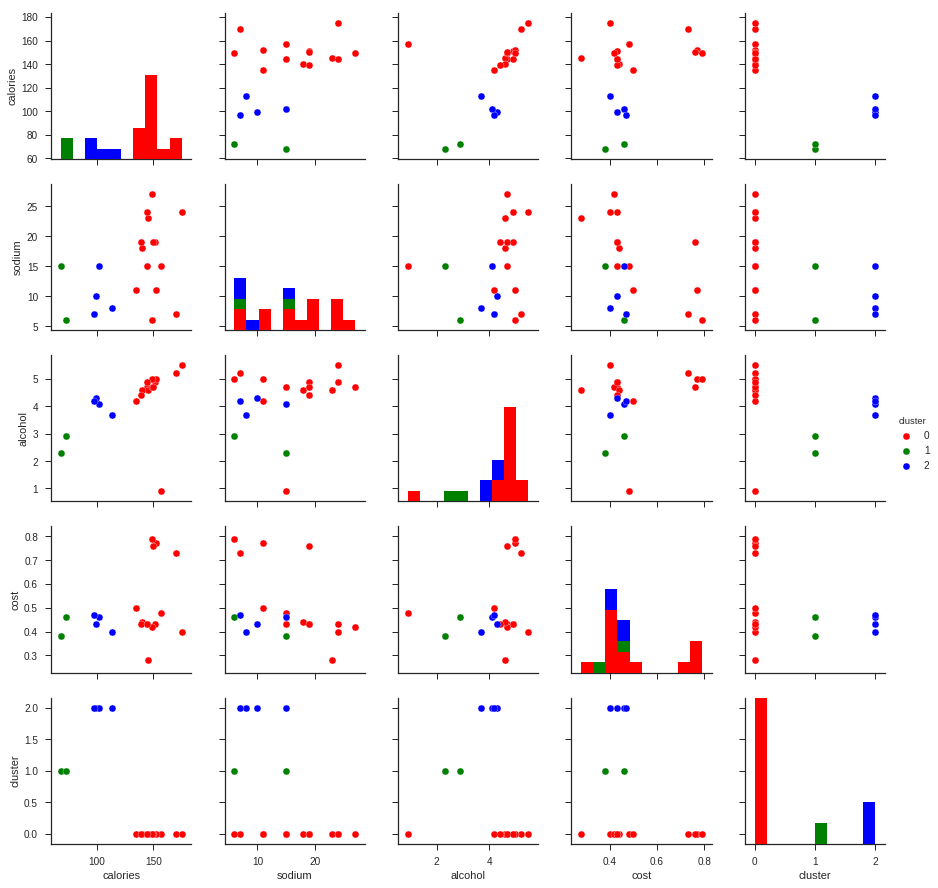

In [16]:
#
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(X, hue='cluster', palette = colors)

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

#### Use StandardScaler to scale the data X.

In [17]:
#
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scale = ss.fit_transform(X[['calories','sodium','alcohol','cost']])

X_scale = pd.DataFrame(X_scale, columns = ['calories','sodium','alcohol','cost'])
X_scale

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265
5,0.421792,1.254943,0.339502,-1.519224
6,1.438159,1.410837,1.188256,-0.669309
7,0.557308,1.878518,0.433808,-0.527656
8,-1.136637,-0.771673,0.056584,-0.456830
9,-0.662332,-1.083460,-0.509253,-0.669309


#### Show the scaled X indeed has mean and standard deviation close to 0 and 1, respectively.

In [18]:
#
print('the mean of scaled X is \n',X_scale.mean())
print('the standard deviation of scaled X is \n',X_scale.std())

the mean of scaled X is 
 calories   -3.219647e-16
sodium      7.771561e-17
alcohol    -1.003711e-15
cost       -3.608225e-16
dtype: float64
the standard deviation of scaled X is 
 calories    1.025978
sodium      1.025978
alcohol     1.025978
cost        1.025978
dtype: float64


#### Repeat K-means with three clusters on scaled data.

In [19]:
#
model = KMeans(n_clusters=3, random_state=0).fit(X_scale)
predicted = model.labels_
print("Predicted clusters to points: ", predicted)

Predicted clusters to points:  [1 1 0 2 2 1 1 1 0 0 1 0 0 2 2 0 1 1 0 0]


#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [20]:
#
X_scale['cluster'] = predicted
X_scale
X_scale.sort_values('cluster')

,calories,sodium,alcohol,cost,cluster
9,-0.662332,-1.083460,-0.509253,-0.669309,0
15,-2.186883,0.007795,-1.829537,-0.810961,0
12,0.083003,-0.615780,-0.037722,0.038954,0
11,-1.035000,0.007795,-0.132028,-0.244351,0
18,-2.051367,-1.395248,-1.263701,-0.244351,0
8,-1.136637,-0.771673,0.056584,-0.456830,0
19,-1.204395,-1.239354,-0.037722,-0.173524,0
2,0.828339,0.007795,-3.149822,-0.102698,0
7,0.557308,1.878518,0.433808,-0.527656,1
5,0.421792,1.254943,0.339502,-1.519224,1


#### What are the "characteristics" of each cluster?

**Answer: The values of four columns are almost below 0 is classified to 0 cluster, and only one column -the values of 'cost' column are below 0, and the values in the other columns above 0, is classified to 1 cluster, and in the 2 culster, the values in the 'sodium' column is all below 0 except one value, and the other values all above than 0.  ** 

#### Show the cluster centers.

In [21]:
#
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]


#### Create scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

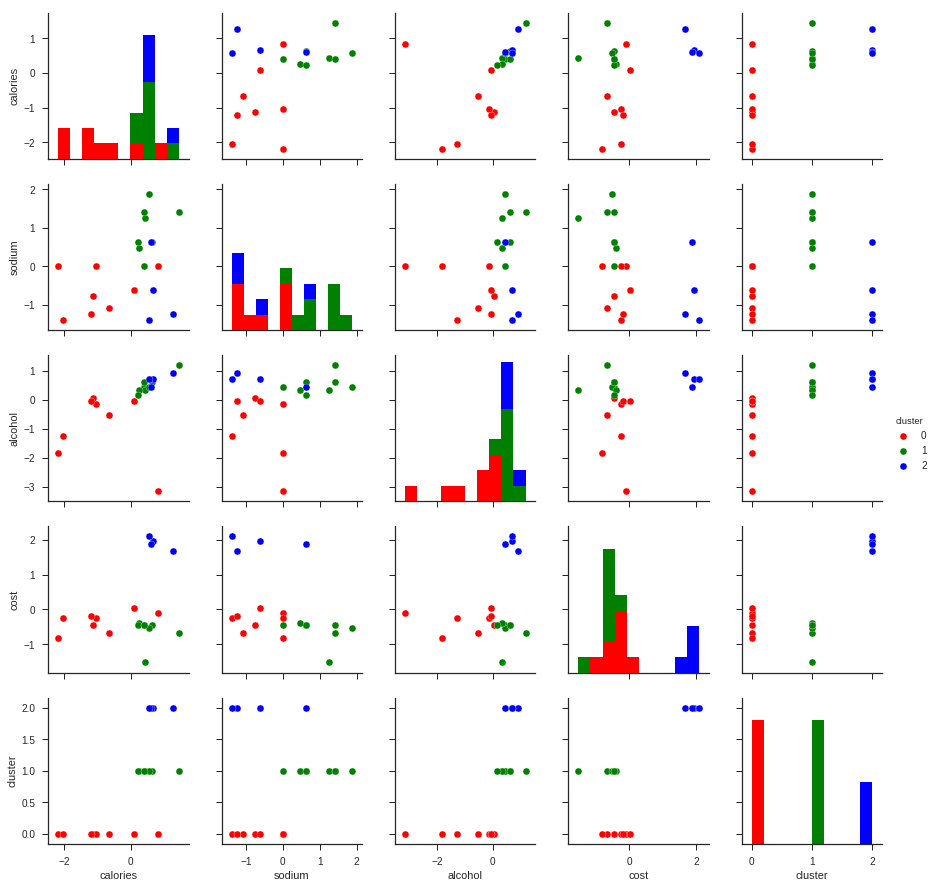

In [22]:
#

sns.pairplot(X_scale, hue='cluster', palette = colors)

#### Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:**

 **Answer: It appears that sodium is not so relevant in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type **

####  Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:** It appears that `sodium` is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

### Applying the elbow method to k-means

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) is one possible method to help narrow in on the ideal value of **K**. The method is built around the concept of diminishing returns where the percentage of explained variance is reviewed as a function of the number of clusters: One should choose a number of clusters where the next cluster doesn't significantly explain additional variance. 

[Determining the right number of clusters](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)   

Try a range of K and plot both the Inertia Over K and Silhouette Over K curves.

In [24]:
#
inertia = model.inertia_
print ('inertia: ',inertia)    
print ('Silhouette Score:', metrics.silhouette_score(X_scale.drop('cluster', axis = 1), X_scale.cluster, metric='euclidean'))


inertia:  27.849901261962508
Silhouette Score: 0.45777415910909475


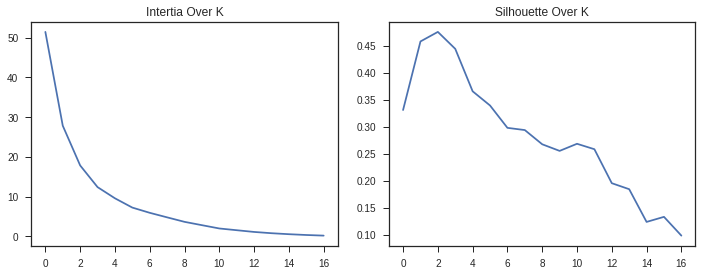

In [25]:
values = range(2,19)
scores = []
for value in values:        
    model = KMeans(n_clusters = value)
    X_scale_df = X_scale[['calories','sodium','alcohol','cost']]
    model.fit(X_scale_df)
    score    = silhouette_score(X_scale_df, model.labels_)
    inertia = model.inertia_
    scores.append({
                    "inertia":    inertia,
                    "silhouette": score
                })

eval_scores = pd.DataFrame(scores)
eval_scores.head()

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")

# Add the arrow!
#ax[0].annotate('Elbow @ K=2', xy = (0.18, .5),  xycoords = 'axes fraction', \
    #xytext = (0.2, 0.6), fontsize = 14, \
    #color = '#303030', arrowprops=dict(facecolor='black', shrink=0.05))

fig.tight_layout()

#### Let's analyze the above

- Do you see the **"elbow"**?

- What's the best value of k?



**Answer : I can see the "elbow", I think it shows when k = 3 or 5, even not so obviously from the intertia.  The Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters, when k =2, it's best, when k =3, it's still ok, not so bad. So if we intergate the two values Inertia and Silhouette Coefficient, when k = 3, I think it is the best value of K . **